## Problem Statement

We need to predict the chance of admission based on the students various scores.

The dataset contains the various features:
* GRE Score
* TOEFL Score
* SOP
* LOR
* CGPA
* Research
The target variable is: Chance of Admission

Refer SKlearn official Documnetation if you are not sure about syntax or parameter .

https://scikit-learn.org/stable/index.html

In [40]:
#importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the dataset
data=pd.read_csv("https://raw.githubusercontent.com/s4sauravv/Datasets/main/Admission_Prediction.csv")

In [3]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [4]:
data.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,496,332.0,108.0,5.0,4.5,4.0,9.02,1,0.87
496,497,337.0,117.0,5.0,5.0,5.0,9.87,1,0.96
497,498,330.0,120.0,5.0,4.5,5.0,9.56,1,0.93
498,499,312.0,103.0,4.0,4.0,5.0,8.43,0,0.73
499,500,327.0,113.0,4.0,4.5,4.5,9.04,0,0.84


In [5]:
data.shape

(500, 9)

There are 500 rows and 9 columns

In [7]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [11]:
#checking for missing values
print(data.isnull().sum())
data.isnull().sum().sum()

Serial No.            0
GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64


40

We can see there are some missing values present in the dataset.

After analyzing the dataset, we found that there are 40 missing values. To maintain the dataset size and integrity, we choose to fill the missing values with the mean/median/mode of their respective columns. This approach helps in preserving the information while ensuring that the dataset remains complete for further analysis and modeling.

In [13]:
#filling the null values
data['University Rating'] = data['University Rating'].fillna(data['University Rating'].mode()[0])
data['TOEFL Score'] = data["TOEFL Score"].fillna(data['TOEFL Score'].mean())
data['GRE Score'] = data['GRE Score'].fillna(data['GRE Score'].mean())

In [15]:
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

Verified that now no null values are present

In [18]:
data.duplicated().sum()

0

There are no duplicate values.

In [20]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.118000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.103952,6.051338,1.128993,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,309.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,316.558763,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,324.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


Now , The data looks good and there are no missing values , also the first column is just serial number , so we dont need that column . Lets drop it form the data and make it more clean.

In [21]:
data = data.drop(columns=['Serial No.'])

Lets visualize the data and analyze the relationship between independent and dependent variables

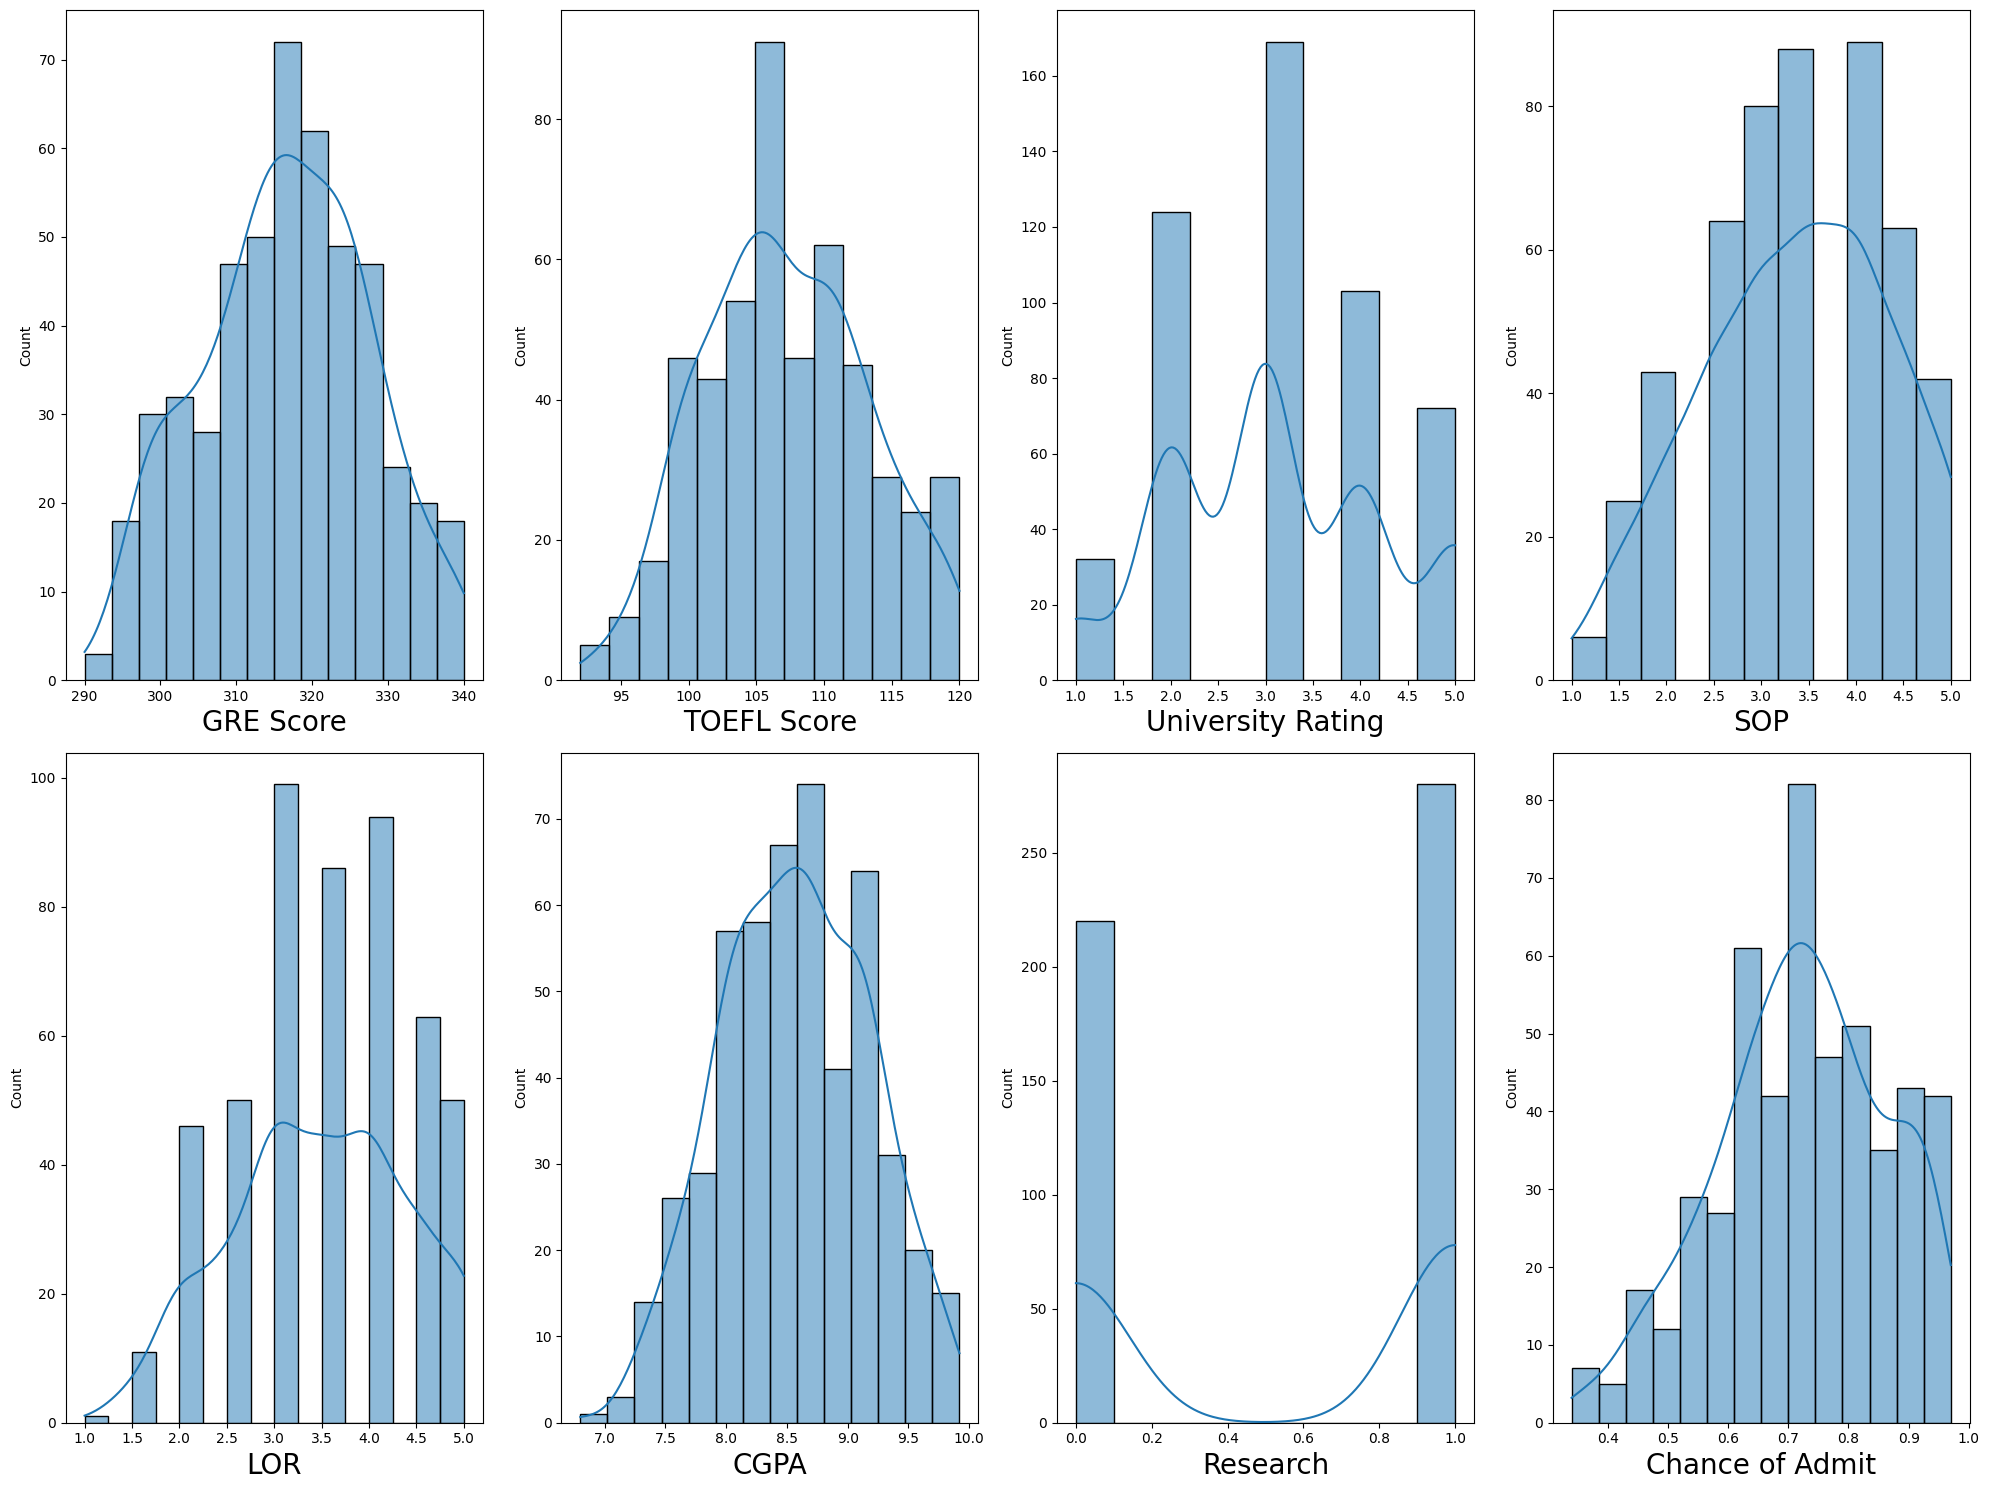

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 15), facecolor='white')
plotnumber = 1
for column in data:
    if plotnumber <= 8:
        ax = plt.subplot(2, 4, plotnumber)
        sns.histplot(data[column], kde=True)
        plt.xlabel(column, fontsize=20)
    plotnumber += 1
plt.tight_layout()
plt.show()

The data distribution looks decent enough and there doesnot sems to by any skeweness.

In [33]:
#Spliting data into features and target variable. 
y = data['Chance of Admit']
x = data.drop(columns=['Chance of Admit'])

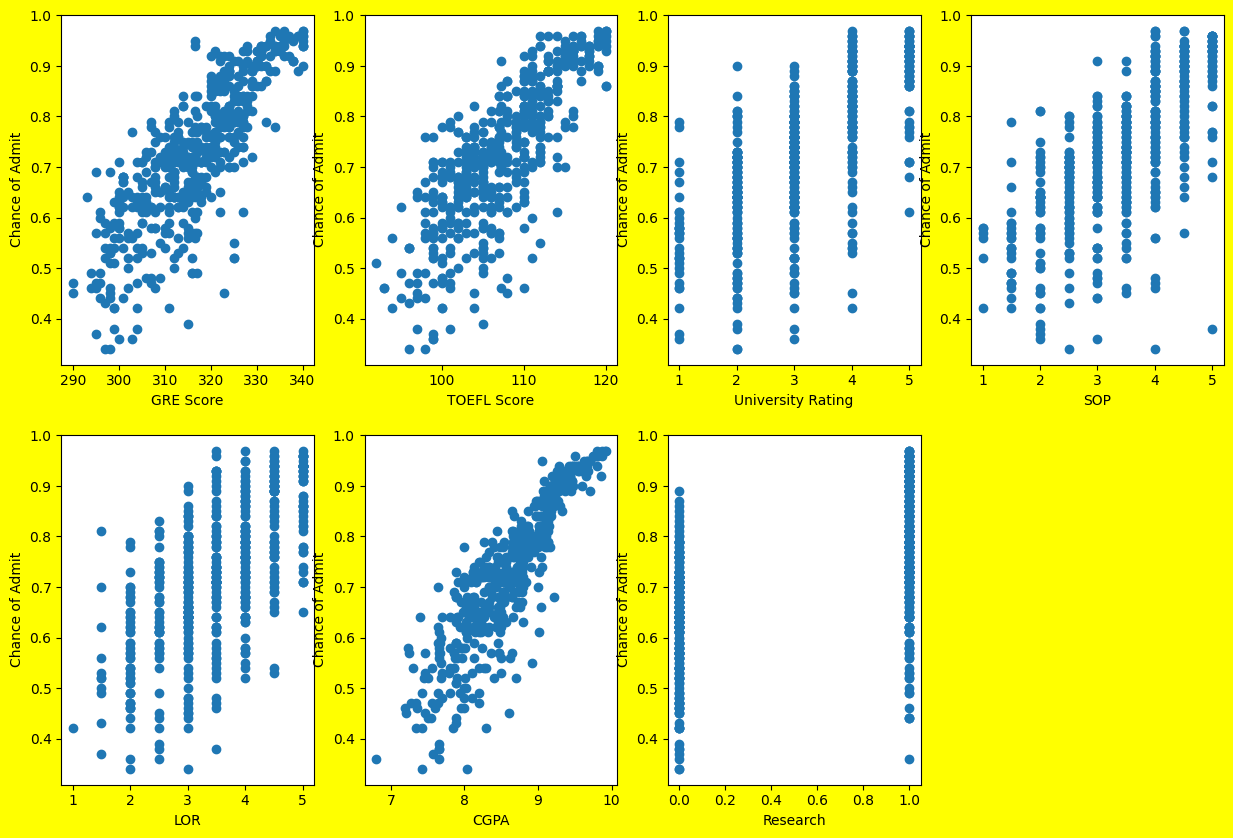

In [34]:
#Visualizing  relationship

plt.figure(figsize=(15,10),facecolor='yellow')
plotnumber=1
for column in x:
    if plotnumber <=8:
        ax=plt.subplot(2,4,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column , fontsize=10)
        plt.ylabel('Chance of Admit',fontsize=10)
    plotnumber +=1
plt.show()

# Feature scaling
Feature scaling is an important preprocessing step for linear regression models. It ensures that all features contribute equally to the model by transforming them to a common scale. We use StandardScaler to standardize the features by removing the mean and scaling to unit variance. This helps in speeding up the convergence of gradient descent and improving model performance.

In [36]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [37]:
x_scaled

array([[ 1.84274116e+00,  1.78854223e+00,  7.82009548e-01, ...,
         1.09894429e+00,  1.77680627e+00,  8.86405260e-01],
       [ 6.70814288e-01, -3.10581135e-02,  7.82009548e-01, ...,
         1.09894429e+00,  4.85859428e-01,  8.86405260e-01],
       [ 5.12433309e-15, -5.27312752e-01, -1.04622593e-01, ...,
         1.73062093e-02, -9.54042814e-01,  8.86405260e-01],
       ...,
       [ 1.21170361e+00,  2.11937866e+00,  1.66864169e+00, ...,
         1.63976333e+00,  1.62785086e+00,  8.86405260e-01],
       [-4.10964364e-01, -6.92730965e-01,  7.82009548e-01, ...,
         1.63976333e+00, -2.42366993e-01, -1.12815215e+00],
       [ 9.41258951e-01,  9.61451165e-01,  7.82009548e-01, ...,
         1.09894429e+00,  7.67219636e-01, -1.12815215e+00]])

In [43]:
#Split the data into training and testing sets
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25, random_state=42)

# Model Instantiating and Training

In [44]:
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [45]:
#Predict the chance of admission give feature
data.tail(2)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
498,312.0,103.0,4.0,4.0,5.0,8.43,0,0.73
499,327.0,113.0,4.0,4.5,4.5,9.04,0,0.84


In [46]:
#Since we vahe already fit the scaler . you can tranform the data .
print("Chance of Admission is : ",regression.predict(scaler.transform([[327.0,113.0,4.0,4.5,4.5,9.04,0]])))

Chance of Admission is :  [0.82385508]


# Model Evaluation

Now its time to check how good in our model. Lets check how well model fits on train data.

In [50]:
#Adjusted R2
regression.score(x_train,y_train)

#Training Score
# So that is how i am going to check how good my model understood the training data.

0.8205681087702014

In [51]:
#How Well my model will understand testing data.
# Lets check how well model fits the test data
regression.score(x_test,y_test)

#Testing Score

0.8175156689543608

# Lets Plot and Visualize

Now i wanted to test it , Now i am going to pass only x_test to regression model and it is going to predict.

 and i also have actual label


 then i will compare predicted data to actual data .


 Whatever the result am going to get its my model Confidence / How well my model will perform.

In [52]:
y_pred =(regression.predict(x_test))
y_pred

array([0.91672616, 0.79942231, 0.56537979, 0.71862135, 0.8175083 ,
       0.86211708, 0.47703811, 0.68387279, 0.82887511, 0.80907627,
       0.71810694, 0.72660196, 0.64934137, 0.93415008, 0.82748891,
       0.51040402, 0.83525243, 0.59940765, 0.53462827, 0.57206316,
       0.66614056, 0.55142244, 0.72357103, 0.79269463, 0.77908602,
       0.60610011, 0.95192416, 0.84668915, 0.62499053, 0.74517829,
       0.55420619, 0.7304802 , 0.54296781, 0.86424788, 0.65376644,
       0.73670757, 0.55500483, 0.9287975 , 0.64603766, 0.71146422,
       0.969428  , 0.57490522, 0.69110891, 0.85847298, 0.93998053,
       0.57952146, 0.95980988, 0.83805971, 0.79556134, 0.92836647,
       0.8920795 , 0.59797278, 0.70562358, 0.52141272, 0.95384125,
       0.58675825, 0.958073  , 0.73934295, 0.66769138, 0.50076826,
       0.63491504, 0.68223864, 0.59945475, 0.58819371, 0.43823095,
       0.58443491, 0.86932829, 0.89844722, 0.65768374, 0.70561723,
       0.61866988, 0.78440334, 0.68827935, 0.55834194, 0.55571

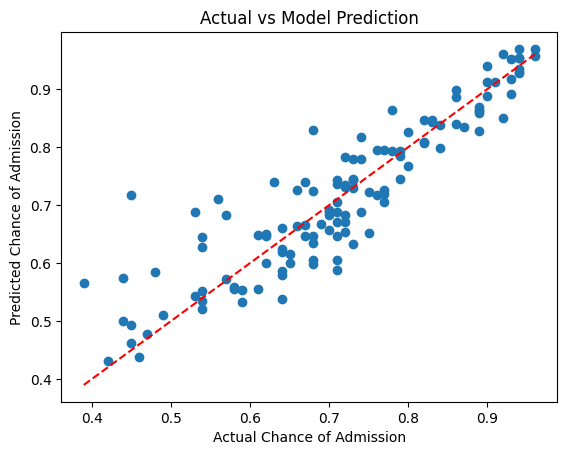

In [54]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Diagonal line
plt.xlabel('Actual Chance of Admission')
plt.ylabel('Predicted Chance of Admission')
plt.title('Actual vs Model Prediction')
plt.show()


In [56]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
y_pred=regression.predict(x_test)